In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("21-housing.csv")

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [17]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']

IndexError: index 3 is out of bounds for axis 0 with size 3

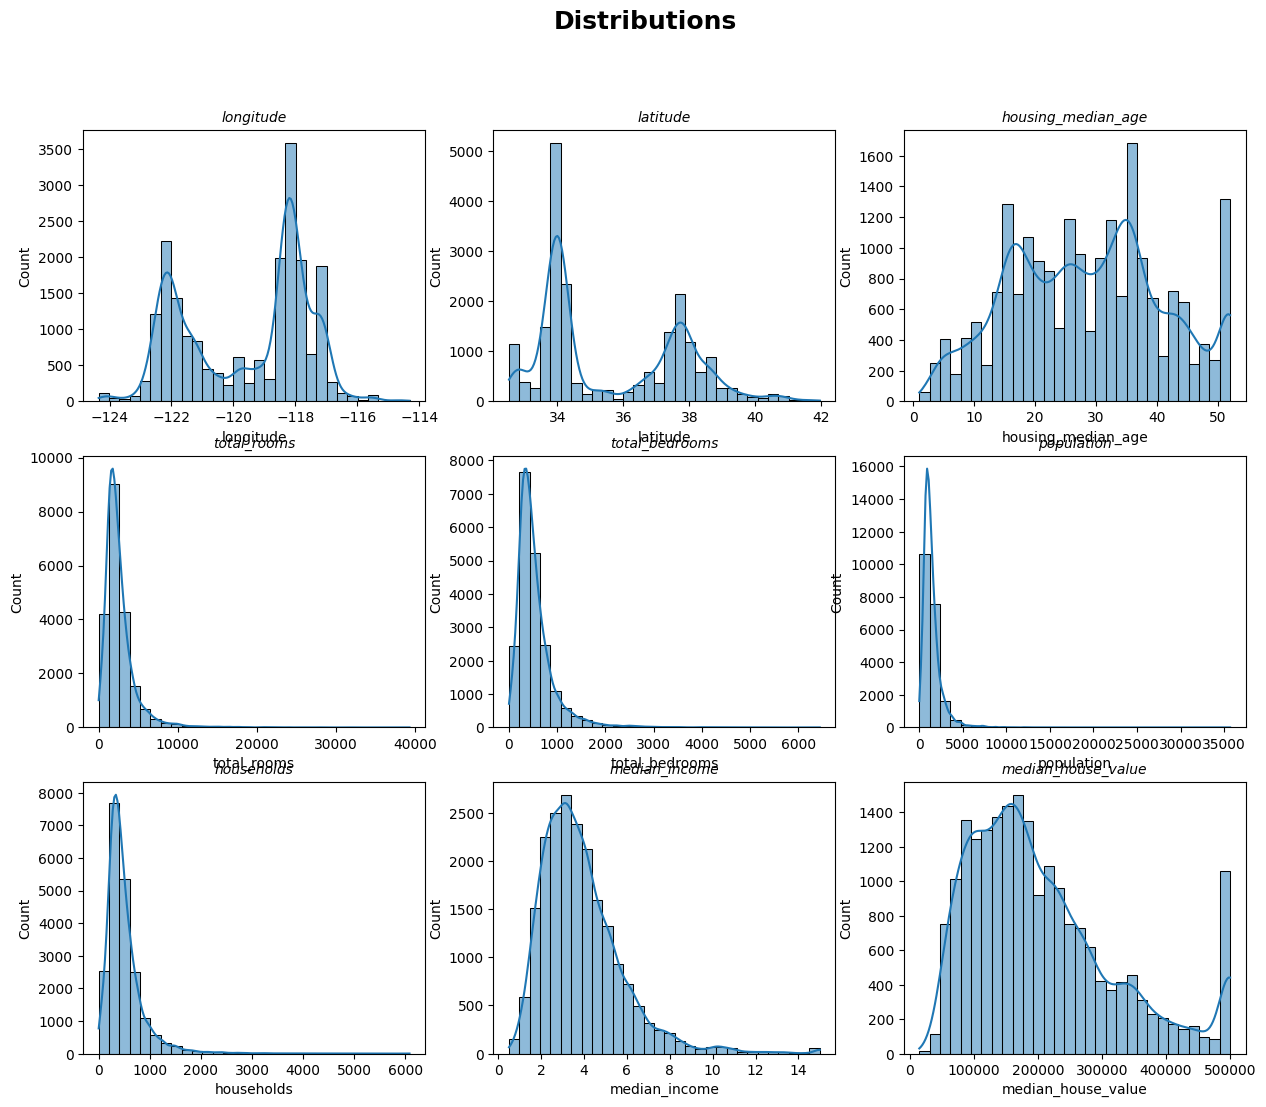

In [18]:
# Distributions

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize=18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i// 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde = True, ax = ax, bins = 30)
    ax.set_title(col, fontsize = 10, fontstyle = "italic")
plt.tight_layout()
plt.show()

In [19]:

df.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [20]:
# Outlier Detection
def find_outliers_iqr(df, treshold=1.5 ):
    outlier_sum = {}

    numeric_cols = df.select_dtypes(include = ["float64", "int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - treshold * IQR
        upper_bound = Q3 + treshold * IQR
        
        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound) ]
        outlier_sum[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound,
        }
    return pd.DataFrame(outlier_sum)

In [21]:
find_outliers_iqr(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [22]:
def remove_outliers_from_column(df, target_col, treshold=1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - treshold * IQR
    upper_bound = Q3 + treshold * IQR
    return df[ (df[target_col] >= lower_bound) & (df[target_col] <= upper_bound) ]

In [23]:
def remove_outliers_from_all(df, treshold=1.5):
    df_clean = df.copy()
    
    numeric_cols = df.select_dtypes(include = ["float64", "int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - treshold * IQR
        upper_bound = Q3 + treshold * IQR
        
        df_clean = df_clean[ (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound) ]
    return df_clean.copy()

In [24]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [25]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [27]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\irm\AppData\Local\Temp\ipykernel_16712\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [28]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,538.841739,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,420.612109,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,299.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,645.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [29]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [30]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [31]:
df_target_clean = pd.get_dummies(df_target_clean, columns = ["ocean_proximity"], drop_first=True)

In [32]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [33]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [35]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [37]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [38]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for training set")
    print("Root Mean Squared Error: ", train_rmse)
    print("Mean Absolute Error: ", train_mae)
    print("R2 Score: ", train_r2)

    print("------------------------------------")

    print("Model performance for test set")
    print("Root Mean Squared Error: ", test_rmse)
    print("Mean Absolute Error: ", test_mae)
    print("R2 Score: ", test_r2)

    print("------------------------------------")
    print("\n")

Linear Regression
Model performance for training set
Root Mean Squared Error:  209.40466838777215
Mean Absolute Error:  43850.315142592815
R2 Score:  0.6128805738428413
------------------------------------
Model performance for test set
Root Mean Squared Error:  208.53100220459095
Mean Absolute Error:  43485.178880451116
R2 Score:  0.6205063758315
------------------------------------


Lasso
Model performance for training set
Root Mean Squared Error:  209.4061824358143
Mean Absolute Error:  43850.949242341536
R2 Score:  0.6128800874217817
------------------------------------
Model performance for test set
Root Mean Squared Error:  208.53176455817086
Mean Absolute Error:  43485.49682974441
R2 Score:  0.6205178588391278
------------------------------------


K Neighbors Regressor
Model performance for training set
Root Mean Squared Error:  238.26775567115902
Mean Absolute Error:  56771.52339257113
R2 Score:  0.4175983459708399
------------------------------------
Model performance for te

In [39]:
params=  {
    "n_estimators" : [100,200,300,500],
    "max_depth" : [5,8,12,20,30],
    "learning_rate" : [0.01, 0.1],
    "colsample_bytree" : [0.3,0.4,0.5,0.7,1]
}  

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rcv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions= params, cv=5, n_jobs=-1)

In [42]:
rcv.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'learning_rate': [0.01, 0.1], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
rcv.best_params_

{'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [47]:
model = XGBRegressor(n_estimators = 500, max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.5)

In [48]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for training set")
    print("Root Mean Squared Error: ", train_rmse)
    print("Mean Absolute Error: ", train_mae)
    print("R2 Score: ", train_r2)

    print("------------------------------------")

    print("Model performance for test set")
    print("Root Mean Squared Error: ", test_rmse)
    print("Mean Absolute Error: ", test_mae)
    print("R2 Score: ", test_r2)

    print("------------------------------------")
    print("\n")

XGBoost Regressor
Model performance for training set
Root Mean Squared Error:  74.69390147499797
Mean Absolute Error:  5579.178917556704
R2 Score:  0.9931654899833539
------------------------------------
Model performance for test set
Root Mean Squared Error:  167.60863652160327
Mean Absolute Error:  28092.655036630924
R2 Score:  0.8157026224464466
------------------------------------


